**All these process and concept are in the pdf and videos provided in group** <br>
**Please read this and find whether there is any error or should we add more things to it**

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import random
import datetime
import math
%matplotlib inline

**Value Allocation code**

In [2]:
no_of_stock = 30
list=[]
for i in range(30):
    list.append(random.randint(1, 100))
sum_of_list = sum(list)
normalised_list = [round((num/sum_of_list),5) for num in list] 

**Extracting list of top 30 stocks of SENSEX from wikipedia**

In [3]:
sensex = pd.read_html('https://en.wikipedia.org/wiki/List_of_BSE_SENSEX_companies')[0]
sensex = sensex.Symbol
list_of_stocks = sensex.to_list()

**Function defined**

In [4]:
def calculate_returns(stock, start, end):
    data = yf.download(stock, start, end, auto_adjust=True)['Close']
    returns = data.pct_change()  # Calculate percentage changes
    returns*=100
    return returns.dropna()

def VaR(start,end,position_vector,z_score,sensex,stock_list):
    stock_list = stock_list.loc[start:end]
    stock_list = stock_list.iloc[:, :30]
    covariance_matrix = stock_list.cov()
    portfolio_Var = np.dot(position_vector,np.dot(covariance_matrix,position_vector.T))
    portfolio_Var_absolute = np.sqrt(portfolio_Var)*z_score
    return round(portfolio_Var_absolute[0][0],5)

**Extracting data using yfinance lib**

In [5]:
stock_list = pd.DataFrame(columns = list_of_stocks)
stock_list

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,JSWSTEEL.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO


In [6]:
start =  datetime.date(2003, 1, 1)
end =  datetime.date(2024, 4, 10)

In [7]:
for stock in stock_list:
    stock_list[stock] = calculate_returns(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [8]:
stock_list = stock_list.fillna(0)
stock_list

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,JSWSTEEL.BO,HDFCBANK.BO,...,NTPC.BO,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,1.447696,-4.464266,0.000000,2.947349,0.000000,-1.091712,0.000000,-1.929288,-4.587140,-0.228308,...,0.000000,3.295290,0.000000,-1.578771,1.857437,0.241009,0.000000,0.000000,-2.827788,0.000000
2003-01-03,-0.652766,-1.752373,0.000000,0.000000,0.000000,-0.441494,0.412420,0.218593,6.730789,-1.464527,...,0.000000,0.220965,0.000000,-1.740631,-0.712043,3.341369,0.000000,0.000000,-2.050283,0.000000
2003-01-06,0.764028,-0.356699,0.000000,-2.453981,0.000000,-1.330383,0.941952,-0.354363,-5.405482,-0.185793,...,0.000000,1.433090,0.000000,-1.059370,-2.396353,-3.064860,0.000000,0.000000,-1.012836,0.000000
2003-01-07,0.288160,0.357976,0.000000,0.209651,0.000000,-0.898872,2.251506,-0.820813,0.000000,1.372764,...,0.000000,1.032472,0.000000,0.122854,0.197115,-0.753159,0.000000,0.000000,-1.091418,0.000000
2003-01-08,-0.241961,2.259225,0.000000,1.673631,0.000000,-1.587304,0.519962,0.165487,5.714372,-1.285318,...,0.000000,-2.796832,0.000000,1.385011,0.447125,-0.858995,0.000000,0.000000,1.241379,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03,-0.127024,1.508214,-2.129001,1.395050,-1.079843,1.406819,-1.803553,0.523526,-1.143538,0.175688,...,1.972163,1.138662,0.286221,-0.972643,0.469152,0.021576,1.665119,1.564709,-1.163254,-0.399908
2024-04-04,1.723145,-0.065833,0.694995,-0.355765,0.942214,-1.505637,0.306250,0.231108,-0.725137,3.058917,...,0.895903,-2.306158,-0.963247,-0.542073,-1.517610,-0.147930,1.413644,1.803346,1.886616,0.068498
2024-04-05,-1.183545,-0.423450,-1.461343,-1.469336,1.247585,-1.275935,0.552008,0.379955,-0.695652,1.407160,...,-0.098663,-0.408924,0.252155,-0.222112,0.671712,-0.669752,-0.587052,-1.204397,-0.745429,-1.824294


**Calculating vaR start from here**

In [9]:
position_vector = np.array([normalised_list])   # this is just the allocation of value/money

In [10]:
#calcualting z_score here we take conf=0.99 of stock data we are calculated
confidence_level = 0.99
alpha = 1 - confidence_level
alpha = round((alpha),3)
z_score = norm.ppf(alpha)

In [11]:
VaR(start,'2019-01-01',position_vector,z_score,sensex,stock_list)

-3.38684

In [12]:
#distribution of returns untill 2019   adding daily returns value to a column in stocklist
stock_list['daily_return']=0
for index, row in stock_list.iterrows():
    portfolio_volatility = sum(row[:30] * normalised_list)
    stock_list.loc[index,'daily_return'] = portfolio_volatility


/tmp/ipykernel_4514/163564008.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.5772334835620138' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_list.loc[index,'daily_return'] = portfolio_volatility


In [13]:
stock_list

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,JSWSTEEL.BO,HDFCBANK.BO,...,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO,daily_return
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,1.447696,-4.464266,0.000000,2.947349,0.000000,-1.091712,0.000000,-1.929288,-4.587140,-0.228308,...,3.295290,0.000000,-1.578771,1.857437,0.241009,0.000000,0.000000,-2.827788,0.000000,-0.577233
2003-01-03,-0.652766,-1.752373,0.000000,0.000000,0.000000,-0.441494,0.412420,0.218593,6.730789,-1.464527,...,0.220965,0.000000,-1.740631,-0.712043,3.341369,0.000000,0.000000,-2.050283,0.000000,0.144503
2003-01-06,0.764028,-0.356699,0.000000,-2.453981,0.000000,-1.330383,0.941952,-0.354363,-5.405482,-0.185793,...,1.433090,0.000000,-1.059370,-2.396353,-3.064860,0.000000,0.000000,-1.012836,0.000000,-1.162772
2003-01-07,0.288160,0.357976,0.000000,0.209651,0.000000,-0.898872,2.251506,-0.820813,0.000000,1.372764,...,1.032472,0.000000,0.122854,0.197115,-0.753159,0.000000,0.000000,-1.091418,0.000000,-0.132891
2003-01-08,-0.241961,2.259225,0.000000,1.673631,0.000000,-1.587304,0.519962,0.165487,5.714372,-1.285318,...,-2.796832,0.000000,1.385011,0.447125,-0.858995,0.000000,0.000000,1.241379,0.000000,0.951762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03,-0.127024,1.508214,-2.129001,1.395050,-1.079843,1.406819,-1.803553,0.523526,-1.143538,0.175688,...,1.138662,0.286221,-0.972643,0.469152,0.021576,1.665119,1.564709,-1.163254,-0.399908,0.092265
2024-04-04,1.723145,-0.065833,0.694995,-0.355765,0.942214,-1.505637,0.306250,0.231108,-0.725137,3.058917,...,-2.306158,-0.963247,-0.542073,-1.517610,-0.147930,1.413644,1.803346,1.886616,0.068498,0.317581
2024-04-05,-1.183545,-0.423450,-1.461343,-1.469336,1.247585,-1.275935,0.552008,0.379955,-0.695652,1.407160,...,-0.408924,0.252155,-0.222112,0.671712,-0.669752,-0.587052,-1.204397,-0.745429,-1.824294,-0.186834


In [14]:
#we are looking the distribution of returns

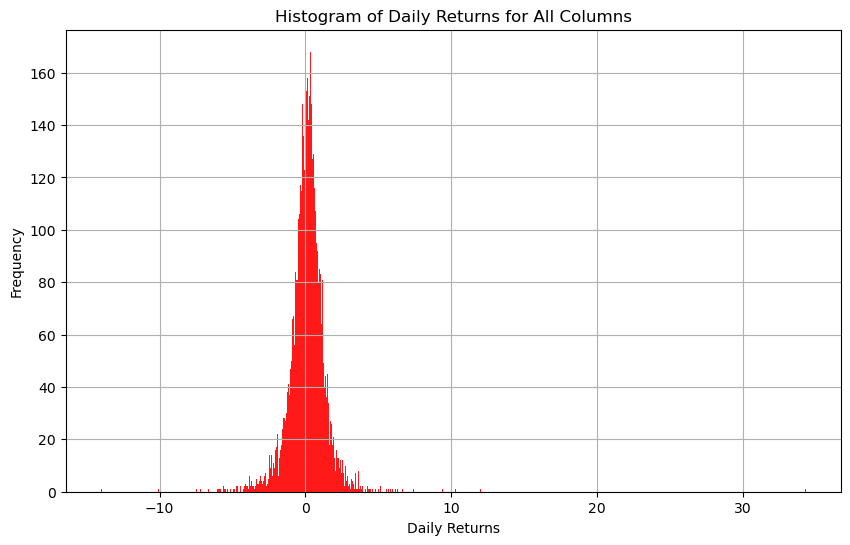

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(stock_list['daily_return'],bins=800, color='red', alpha=0.9)
plt.title('Histogram of Daily Returns for All Columns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Separating data that we want to backtest**

In [16]:
start_index = datetime.date(2019, 1, 1)
end_index = datetime.date(2024, 4, 11)
backtest_df = stock_list.loc[start_index:end_index] 

In [17]:
backtest_df

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,JSWSTEEL.BO,HDFCBANK.BO,...,ONGC.BO,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO,daily_return
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-0.134676,1.242335,0.224398,0.569837,0.486019,2.125275,-0.236911,-0.057135,-0.881638,1.177892,...,-0.832225,0.452260,0.026754,1.251483,0.568912,0.464726,-0.201074,-0.252706,0.209856,0.067354
2019-01-02,0.707075,-1.370515,-1.291945,-1.494615,-1.873998,-2.112347,-0.390684,-1.678793,-4.892104,-1.001190,...,-0.906335,-2.251120,-1.342124,-1.837316,1.662431,1.093391,-1.083873,0.442005,-0.281717,-1.216584
2019-01-03,0.260577,-1.769266,0.409015,-1.091162,-0.145522,0.111894,-0.963241,0.222022,-2.009014,-0.644416,...,-2.981047,-1.074726,-1.315201,-0.952871,-1.124235,-1.388352,-2.921950,-0.321992,-2.625132,-1.013161
2019-01-04,0.010833,1.957384,1.268330,-0.336169,0.503796,3.017723,1.013364,-1.545441,1.838107,0.260390,...,1.710897,1.163991,0.668649,2.216113,-0.585733,-1.186431,-1.418124,-0.016154,0.431346,0.329478
2019-01-07,0.685770,2.839405,-2.824859,-1.031311,-0.293130,0.573471,-1.733501,0.685737,0.520654,0.106239,...,1.304511,1.457429,0.400345,-0.605040,-0.635403,1.211349,0.924746,1.610038,0.487010,0.498324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03,-0.127024,1.508214,-2.129001,1.395050,-1.079843,1.406819,-1.803553,0.523526,-1.143538,0.175688,...,1.138662,0.286221,-0.972643,0.469152,0.021576,1.665119,1.564709,-1.163254,-0.399908,0.092265
2024-04-04,1.723145,-0.065833,0.694995,-0.355765,0.942214,-1.505637,0.306250,0.231108,-0.725137,3.058917,...,-2.306158,-0.963247,-0.542073,-1.517610,-0.147930,1.413644,1.803346,1.886616,0.068498,0.317581
2024-04-05,-1.183545,-0.423450,-1.461343,-1.469336,1.247585,-1.275935,0.552008,0.379955,-0.695652,1.407160,...,-0.408924,0.252155,-0.222112,0.671712,-0.669752,-0.587052,-1.204397,-0.745429,-1.824294,-0.186834


Here I will make two list of dates. In backtest_dates there will be dates of backest_df and var_dates it will have
dates before backtest_df(remember backtest dates are those dates that we will perform backtest to validate model)

In [18]:
backtest_dates=[]
var_dates=[]
for index, row in backtest_df.iterrows():
    backtest_dates.append(index)

for index, row in stock_list[start:start_index + datetime.timedelta(days=-1)].iterrows():
    
    var_dates.append(index)    
backtest_dates.insert(0,var_dates[-1])     

**Here we will add VaR value for each date**

In [19]:
backtest_df['VaR']=0
count=0
for index, row in backtest_df.iterrows():
    start = var_dates[count]
    end = backtest_dates[count]
    backtest_df.loc[index,'VaR']= VaR(start,end,position_vector,z_score,sensex,stock_list)
    count+=1

/tmp/ipykernel_4514/4211381142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_df['VaR']=0
/tmp/ipykernel_4514/4211381142.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-3.38726' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  backtest_df.loc[index,'VaR']= VaR(start,end,position_vector,z_score,sensex,stock_list)


In [20]:
backtest_df

,ASIANPAINT.BO,AXISBANK.BO,BAJAJ-AUTO.BO,BAJFINANCE.BO,BAJAJFINSV.BO,BHARTIARTL.BO,DRREDDY.BO,HCLTECH.BO,JSWSTEEL.BO,HDFCBANK.BO,...,POWERGRID.BO,RELIANCE.BO,SBIN.BO,SUNPHARMA.BO,TCS.BO,TECHM.BO,TITAN.BO,ULTRACEMCO.BO,daily_return,VaR
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,-0.134676,1.242335,0.224398,0.569837,0.486019,2.125275,-0.236911,-0.057135,-0.881638,1.177892,...,0.452260,0.026754,1.251483,0.568912,0.464726,-0.201074,-0.252706,0.209856,0.067354,-3.38726
2019-01-02,0.707075,-1.370515,-1.291945,-1.494615,-1.873998,-2.112347,-0.390684,-1.678793,-4.892104,-1.001190,...,-2.251120,-1.342124,-1.837316,1.662431,1.093391,-1.083873,0.442005,-0.281717,-1.216584,-3.38715
2019-01-03,0.260577,-1.769266,0.409015,-1.091162,-0.145522,0.111894,-0.963241,0.222022,-2.009014,-0.644416,...,-1.074726,-1.315201,-0.952871,-1.124235,-1.388352,-2.921950,-0.321992,-2.625132,-1.013161,-3.38753
2019-01-04,0.010833,1.957384,1.268330,-0.336169,0.503796,3.017723,1.013364,-1.545441,1.838107,0.260390,...,1.163991,0.668649,2.216113,-0.585733,-1.186431,-1.418124,-0.016154,0.431346,0.329478,-3.38746
2019-01-07,0.685770,2.839405,-2.824859,-1.031311,-0.293130,0.573471,-1.733501,0.685737,0.520654,0.106239,...,1.457429,0.400345,-0.605040,-0.635403,1.211349,0.924746,1.610038,0.487010,0.498324,-3.38745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-03,-0.127024,1.508214,-2.129001,1.395050,-1.079843,1.406819,-1.803553,0.523526,-1.143538,0.175688,...,0.286221,-0.972643,0.469152,0.021576,1.665119,1.564709,-1.163254,-0.399908,0.092265,-2.85589
2024-04-04,1.723145,-0.065833,0.694995,-0.355765,0.942214,-1.505637,0.306250,0.231108,-0.725137,3.058917,...,-0.963247,-0.542073,-1.517610,-0.147930,1.413644,1.803346,1.886616,0.068498,0.317581,-2.85184
2024-04-05,-1.183545,-0.423450,-1.461343,-1.469336,1.247585,-1.275935,0.552008,0.379955,-0.695652,1.407160,...,0.252155,-0.222112,0.671712,-0.669752,-0.587052,-1.204397,-0.745429,-1.824294,-0.186834,-2.83908


Here this graph will show on which date daily_return exceed VaR model(Just think why it's important)

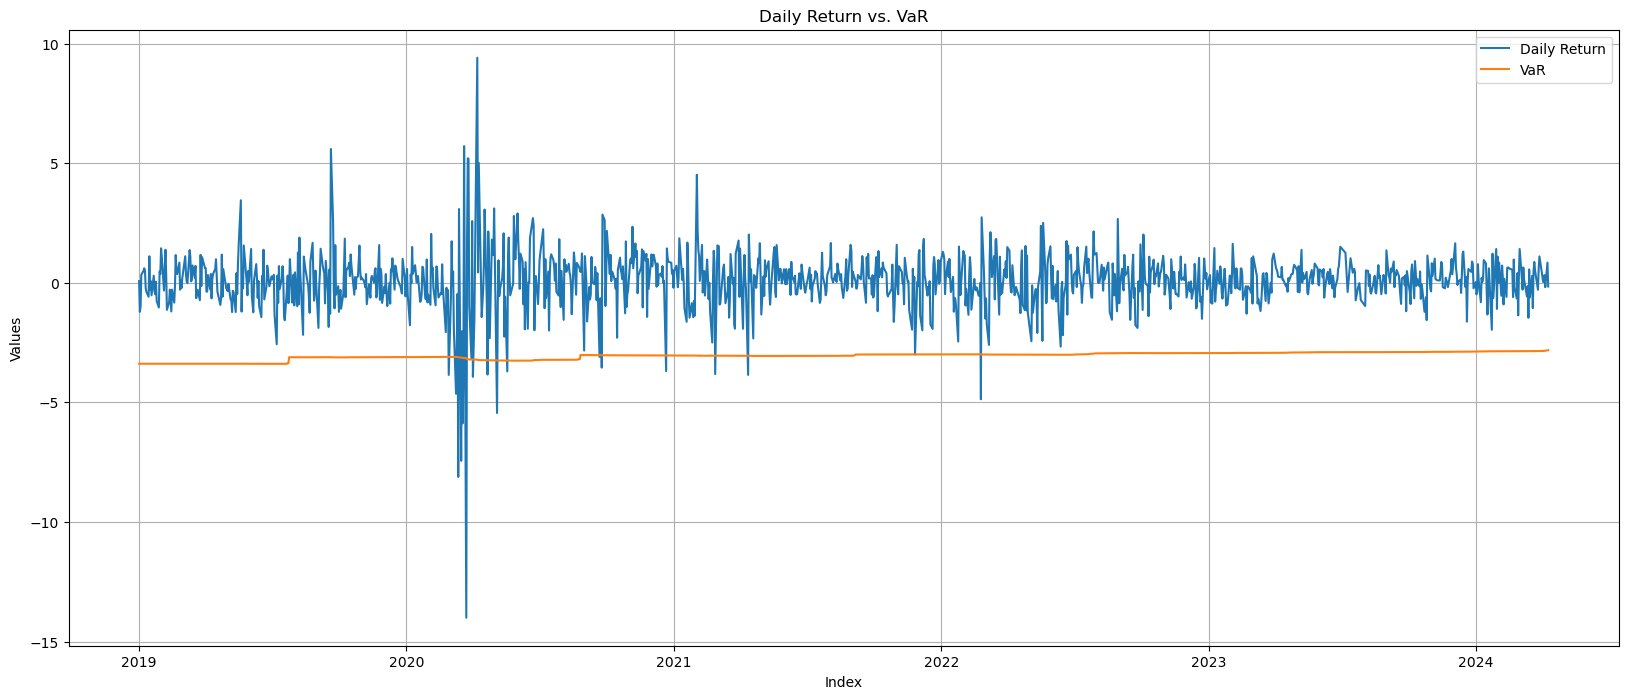

In [21]:
plt.figure(figsize=(20, 8))  # Adjust figure size as needed

plt.plot(backtest_df.index, backtest_df['daily_return'], label='Daily Return')
plt.plot(backtest_df.index, backtest_df['VaR'], label='VaR')


plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Daily Return vs. VaR')
plt.legend()
plt.grid(True) 
plt.show()

Calculation of total no  exceeding days and dates at which it exceed(dates are not important for the calculation)

In [22]:
excedding_days = 0
for index, row in backtest_df.iterrows():
    if (backtest_df.loc[index,'daily_return']<= backtest_df.loc[index,'VaR']):
        print(index)
        excedding_days+=1
        

2020-02-28 00:00:00
2020-03-09 00:00:00
2020-03-12 00:00:00
2020-03-16 00:00:00
2020-03-18 00:00:00
2020-03-19 00:00:00
2020-03-23 00:00:00
2020-04-01 00:00:00
2020-04-21 00:00:00
2020-05-04 00:00:00
2020-05-18 00:00:00
2020-09-21 00:00:00
2020-09-24 00:00:00
2020-12-21 00:00:00
2021-02-26 00:00:00
2021-04-12 00:00:00
2021-11-26 00:00:00
2022-02-24 00:00:00


In [23]:
excedding_days

18

Null  Hypothesis : Model is correct <br>
alternate Hypothesis: Model is not correct

In [24]:
p = 0.01

In [25]:
 backtested_trading_days = backtest_df.shape[0]

In [26]:
expected_number_of_exceed = backtested_trading_days*0.01

**confidence interval for hypothesis test and VaR are different watch youtube video provided in group**

**hypothesis testing (2-tail test)** Think a bit why two tail or see the youtube video provided <br>
We need to find whether our exceeding days can be accept to support our model or not <br> 
daily return exceed VaR or not follows binomial distribution  as np>=5 or 10 we can assume binomial distribution as normal distribution 


Please check this process whether the below process is correct or not 

In [32]:
z_ = (excedding_days - expected_number_of_exceed)/np.sqrt(p*(1-p)*backtested_trading_days)

In [33]:
z_

1.454012532575175

In [29]:
 norm.ppf(0.025)

-1.9599639845400545

Right Z value = 1.95999

In [ ]:
as z_< Z we cannot reject our null hypothesis